Câu 3. Hồi quy tuyến tính (3 điểm)
Tập tin ‘IQ6.xls’ chứa dữ liệu huấn luyện về mối quan hệ giữa chỉ số IQ với điểm thi của các môn học.
3.1) Vẽ biểu đồ phân phối tần số và cho biết những giá trị thống kê cơ bản của điểm thi các môn.
Xác định outlier(s), nếu có, của chỉ số IQ và điểm thi của các môn dựa trên quy tắc 3-Sigma.
3.2) Tính hệ số tương quan Pearson giữa IQ và các điểm thi. Trên cơ sở đó, chọn điểm thi của 1
trong các môn để dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính bằng a) Gradient
Descent VÀ b) Ma trận giả nghịch đảo. Trực quan hóa dữ liệu.
3.3) Dự đoán chỉ số IQ cho tập dữ liệu thử nghiệm (test set): { 0.5, 1.0, 1.5, 2.0, …, 9.0, 9.5, 10 }.
3.4) Nhận xét kết quả khi dùng diem_5 để dự đoán chỉ số IQ.

In [2]:
import pandas as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

from numpy import mean, median
from scipy import stats

In [3]:
df=pd.read_excel("IQ6.xls",index_col=0)
df

,diem_1,diem_2,diem_3,diem_4,diem_5,diem_6,IQ
stt,,,,,,,
1,8,2.0,7.0,7,1.4,8.0,68
2,8,8.4,6.4,8,4.0,1.6,137
3,7,7.6,7.8,8,5.2,2.4,135
4,8,7.0,2.5,6,6.4,7.0,79
5,8,4.4,3.8,6,1.0,5.6,107
6,8,6.4,7.2,7,5.6,3.6,128
7,7,8.0,8.4,8,4.4,2.0,120
8,8,2.8,6.8,6,0.4,7.2,74
9,6,5.2,5.0,7,5.0,4.8,110


C:\Users\gtp43728\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gtp43728\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gtp43728\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

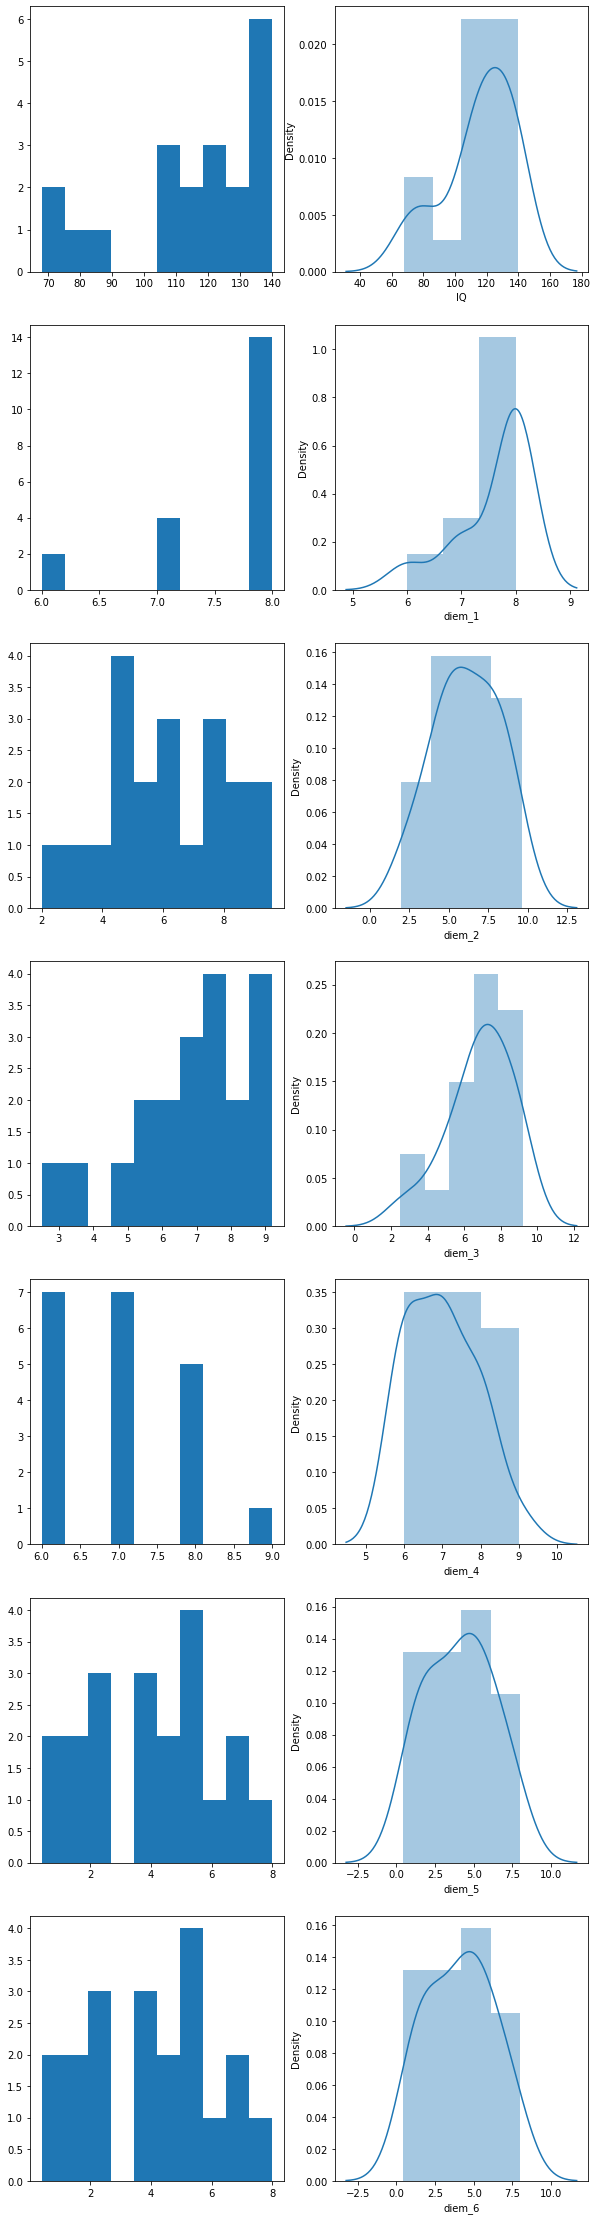

In [4]:
#3.1.
plt.figure(figsize = (10, 40))
plt.subplot(7, 2, 1)
plt.hist(df.IQ)
plt.subplot(7, 2, 2)
sns.distplot(df.IQ)
plt.subplot(7, 2, 3)
plt.hist(df.diem_1)
plt.subplot(7, 2, 4)
sns.distplot(df.diem_1)
plt.subplot(7, 2, 5)
plt.hist(df.diem_2)
plt.subplot(7, 2, 6)
sns.distplot(df.diem_2)
plt.subplot(7, 2, 7)
plt.hist(df.diem_3)
plt.subplot(7, 2, 8)
sns.distplot(df.diem_3)
plt.subplot(7, 2, 9)
plt.hist(df.diem_4)
plt.subplot(7, 2, 10)
sns.distplot(df.diem_4)
plt.subplot(7, 2, 11)
plt.hist(df.diem_5)
plt.subplot(7, 2, 12)
sns.distplot(df.diem_5)
plt.subplot(7, 2, 13)
plt.hist(df.diem_6)
plt.subplot(7, 2, 14)
sns.distplot(df.diem_6)

plt.show()

In [5]:
df.describe()

,diem_1,diem_2,diem_3,diem_4,diem_5,diem_6,IQ
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,7.600000,6.120000,6.86000,7.000000,4.080000,4.080000,115.200000
std,0.680557,2.115009,1.79338,0.917663,2.214212,2.214212,22.279563
min,6.000000,2.000000,2.50000,6.000000,0.400000,0.400000,68.000000
25%,7.000000,4.700000,6.07500,6.000000,2.300000,2.300000,109.250000
50%,8.000000,6.200000,7.10000,7.000000,4.200000,4.200000,120.000000
75%,8.000000,7.700000,8.17500,8.000000,5.600000,5.600000,134.250000
max,8.000000,9.600000,9.20000,9.000000,8.000000,8.000000,140.000000


C:\Users\gtp43728\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gtp43728\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gtp43728\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gtp43728\Anac

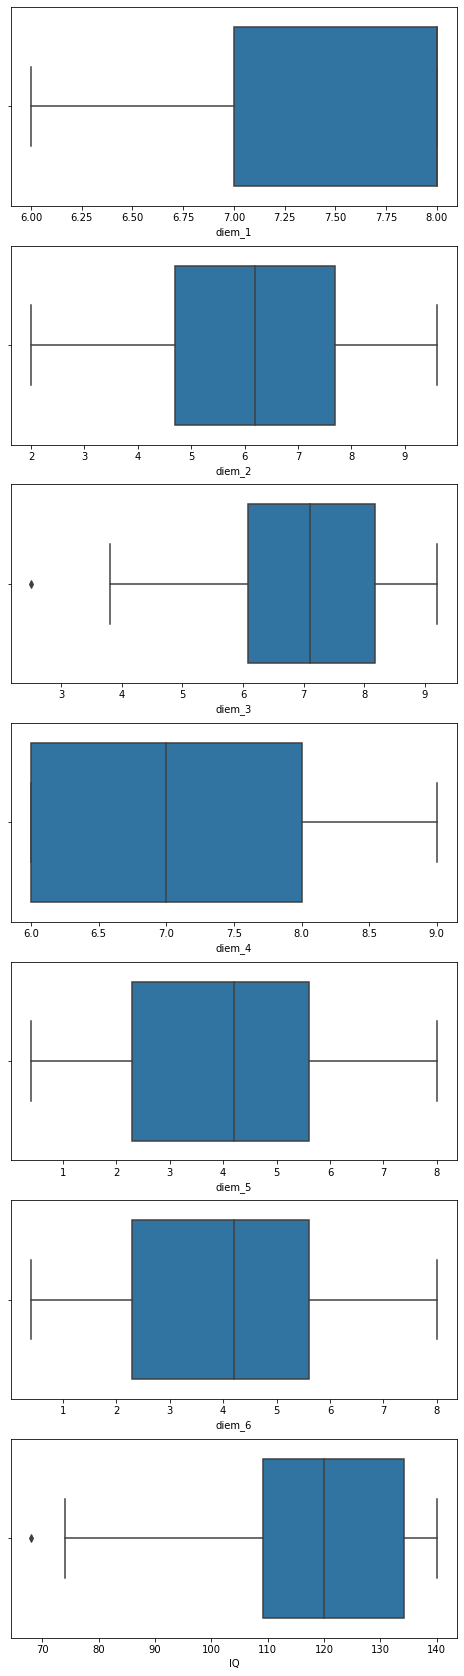

In [6]:
plt.figure(figsize = (8, 30))
plt.subplot(7, 1, 1)
sns.boxplot(df.diem_1)
plt.subplot(7, 1, 2)
sns.boxplot(df.diem_2)
plt.subplot(7, 1, 3)
sns.boxplot(df.diem_3)
plt.subplot(7, 1, 4)
sns.boxplot(df.diem_4)
plt.subplot(7, 1, 5)
sns.boxplot(df.diem_5)
plt.subplot(7, 1, 6)
sns.boxplot(df.diem_6)
plt.subplot(7, 1, 7)
sns.boxplot(df.IQ)
plt.show()





In [7]:
#outliers diem_3
z_scores = stats.zscore(df.diem_3)
print('Z-scores:\n', z_scores)

outliers = z_scores[[(n <= -3)|(n >= 3) for n in z_scores]]
indexes  = [z_scores.tolist().index(i) for i in outliers]
print('Outlier(s) diem_3 [', indexes, ']:', df.loc[indexes,'diem_3'])

#outliers IQ
z_scores = stats.zscore(df.IQ)
print('Z-scores:\n', z_scores)

outliers = z_scores[[(n <= -3)|(n >= 3) for n in z_scores]]
indexes  = [z_scores.tolist().index(i) for i in outliers]
print('Outlier(s) IQ [', indexes, ']:', df.loc[indexes,'IQ'])

Z-scores:
 [ 0.0800929  -0.26316237  0.53776659 -2.49432163 -1.75060188  0.19451132
  0.88102186 -0.03432553 -1.06409134  1.16706792  1.33869555 -0.83525449
  1.05264949  0.30892974  0.19451132  1.33869555 -0.32037159  0.70939422
 -0.94967291 -0.09153474]
Outlier(s) diem_3 [ [] ]: Series([], Name: diem_3, dtype: float64)
Z-scores:
 [-2.17356944  1.00389436  0.91179396 -1.66701724 -0.37761164  0.58944256
  0.22104096 -1.89726824 -0.23946104  0.86574376  1.09599476 -0.23946104
  1.14204496 -0.00921004 -1.25256544  0.58944256  0.22104096 -0.10131044
  0.26709116  1.04994456]
Outlier(s) IQ [ [] ]: Series([], Name: IQ, dtype: int64)


+1 - Complete positive correlation
+0.8 - Strong positive correlation
+0.6 - Moderate positive correlation
0 - no correlation whatsoever
-0.6 - Moderate negative correlation
-0.8 - Strong negative correlation
-1 - Complete negative correlation

In [8]:
#3.2. Chọn diem_2 vì tương quan thuận lớn nhất với IQ
print('IQ vs diem_1:\n',np.corrcoef(df.IQ,df.diem_1))
print('IQ vs diem_2:\n',np.corrcoef(df.IQ,df.diem_2))
print('IQ vs diem_3:\n',np.corrcoef(df.IQ,df.diem_3))
print('IQ vs diem_4:\n',np.corrcoef(df.IQ,df.diem_4))
print('IQ vs diem_5:\n',np.corrcoef(df.IQ,df.diem_5))
print('IQ vs diem_6:\n',np.corrcoef(df.IQ,df.diem_6))


IQ vs diem_1:
 [[ 1.         -0.08816758]
 [-0.08816758  1.        ]]
IQ vs diem_2:
 [[1.        0.7516072]
 [0.7516072 1.       ]]
IQ vs diem_3:
 [[1.         0.47152203]
 [0.47152203 1.        ]]
IQ vs diem_4:
 [[1.         0.62297683]
 [0.62297683 1.        ]]
IQ vs diem_5:
 [[1.         0.43985821]
 [0.43985821 1.        ]]
IQ vs diem_6:
 [[ 1.         -0.87241887]
 [-0.87241887  1.        ]]



-------------- Cách 1: Giải bằng hàm tính Gradient descent ------------
Ma trận x (20, 2)
Ma trận y (20,)

 y = m.x + B --> y =  7.917882905860544 .x + ( 66.74226378585394 )



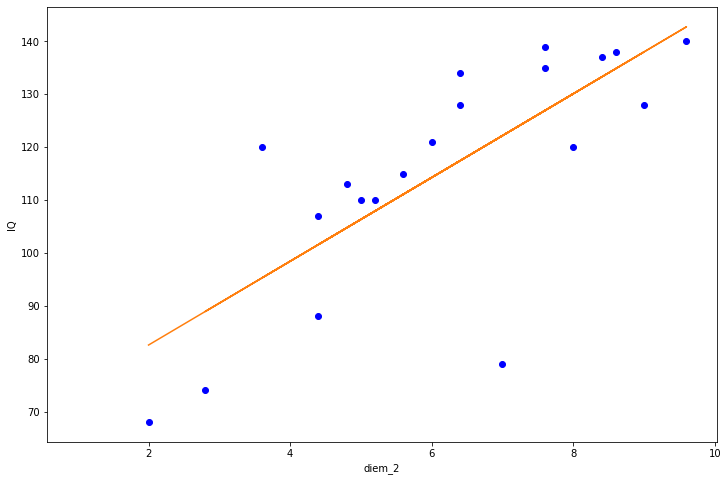

Dự đoán học sinh có điểm 0.5 có IQ: 70.70
Dự đoán học sinh có điểm 1.0 có IQ: 74.66
Dự đoán học sinh có điểm 5.0 có IQ: 106.33
Dự đoán học sinh có điểm 10 có IQ: 110.29

---- Cách 2: Giải bằng công thức dựa trên ma trận giả nghịch đảo ----
Ma trận diem (20,) :
 stt
1    2.0
2    8.4
3    7.6
Name: diem_2, dtype: float64

Ma trận x (20, 1) :
 [[2. ]
 [8.4]
 [7.6]]

Ma trận IQ (20,) :
 stt
1     68
2    137
3    135
Name: IQ, dtype: int64

Vectơ   y (20, 1) :
 [[ 68.]
 [137.]
 [135.]]

Ma trận xBar (20, 2) :
 [[1.  2. ]
 [1.  8.4]
 [1.  7.6]]

Ma trận A (2, 2) :
 [[ 20.   122.4 ]
 [122.4  834.08]]

Ma trận b (2, 1) :
 [[ 2304. ]
 [14773.4]]

Vector chứa các tham số w (2, 1) :
 [[66.74519955]
 [ 7.91745105]]

    y = m.x + B --> y =  [7.91745105] .x + ( [66.74519955] )



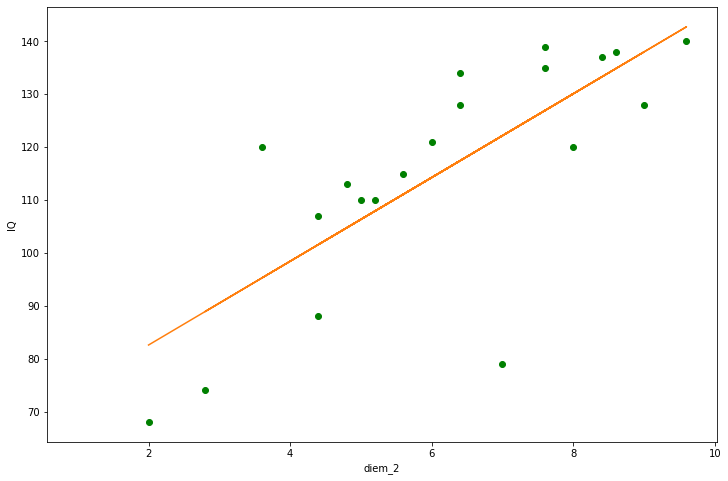

Dự đoán học sinh có điểm 0.5 có IQ: 70.70
Dự đoán học sinh có điểm 1.0 có IQ: 74.66
Dự đoán học sinh có điểm 5.0 có IQ: 106.33
Dự đoán học sinh có điểm 10 có IQ: 145.92


In [9]:
import os, sys
folder   = './Cau 3'
lib_path = os.path.abspath(os.path.join(folder))
sys.path.append(lib_path)
import chapter4_lib as lib

print('\n-------------- Cách 1: Giải bằng hàm tính Gradient descent ------------')
##------------------------------------------------------------------------------

M     = df['diem_2'].size
xBar1 = np.c_[np.ones(M), df['diem_2']]
y     = df['IQ']
alpha = 0.01
theta = lib.gradient_descent_2(alpha, xBar1, y, 10000)

print('Ma trận x', xBar1.shape)
print('Ma trận y', y.shape)

slope1 = theta[1]
bias1  = theta[0]


for i in range(xBar1.shape[1]):
    IQ_predict = (slope1 * xBar1) + bias1

print('\n y = m.x + B --> y = ', slope1, '.x + (', bias1, ')\n')
plt.figure(figsize = (12, 8))
plt.scatter(xBar1[:, 1], df['IQ'], color = "blue")
plt.plot(xBar1, IQ_predict)
plt.xlabel("diem_2")
plt.ylabel("IQ")
plt.show()

diem_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])
IQ_new = (slope1 * diem_new) + bias1
print(u'Dự đoán học sinh có điểm 0.5 có IQ: %.2f' %IQ_new[0])
print(u'Dự đoán học sinh có điểm 1.0 có IQ: %.2f' %IQ_new[1])
print(u'Dự đoán học sinh có điểm 5.0 có IQ: %.2f' %IQ_new[9])
print(u'Dự đoán học sinh có điểm 10 có IQ: %.2f' %IQ_new[10])


print('\n---- Cách 2: Giải bằng công thức dựa trên ma trận giả nghịch đảo ----')

print('Ma trận diem', df['diem_2'].shape, ':\n', df.loc[0:3,'diem_2'])
x = np.zeros((df['diem_2'].size, 1))
x[:, 0] = df['diem_2']
print('\nMa trận x', x.shape, ':\n', x[0:3])

print('\nMa trận IQ', df['IQ'].shape, ':\n', df.loc[0:3,'IQ'])
y = np.zeros((df['IQ'].size, 1))
y[:, 0] = df['IQ']
print('\nVectơ   y', y.shape, ':\n', y[0:3])

one   = np.ones((x.shape[0], 1))
xBar2 = np.concatenate((one, x), axis = 1)
print('\nMa trận xBar', xBar2.shape, ':\n', xBar2[0:3])

A = np.dot(xBar2.T, xBar2)
print('\nMa trận A', A.shape, ':\n', A)

b = np.dot(xBar2.T, y)
print('\nMa trận b', b.shape, ':\n', b)

w = np.dot(np.linalg.pinv(A), b)
print('\nVector chứa các tham số w', w.shape, ':\n', w)

slope2 = w[1] 
bias2  = w[0]   

print('\n    y = m.x + B --> y = ', slope2, '.x + (', bias2, ')\n')
for i in range(xBar2.shape[1]):
    y_predict = (slope2 * xBar2) + bias2

plt.figure(figsize = (12, 8))
plt.scatter(xBar2[:, 1], df['IQ'], color = "green")
plt.plot(xBar2, y_predict)
plt.xlabel("diem_2")
plt.ylabel("IQ")
plt.show()

diem_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])
IQ_new = (slope2 * diem_new) + bias2
print(u'Dự đoán học sinh có điểm 0.5 có IQ: %.2f' %IQ_new[0])
print(u'Dự đoán học sinh có điểm 1.0 có IQ: %.2f' %IQ_new[1])
print(u'Dự đoán học sinh có điểm 5.0 có IQ: %.2f' %IQ_new[9])
print(u'Dự đoán học sinh có điểm 10 có IQ: %.2f' %IQ_new[19])




-------------- Cách 1: Giải bằng hàm tính Gradient descent ------------
Ma trận x (20, 2)
Ma trận y (20,)

 y = m.x + B --> y =  4.425884587914176 .x + ( 97.14239086804936 )



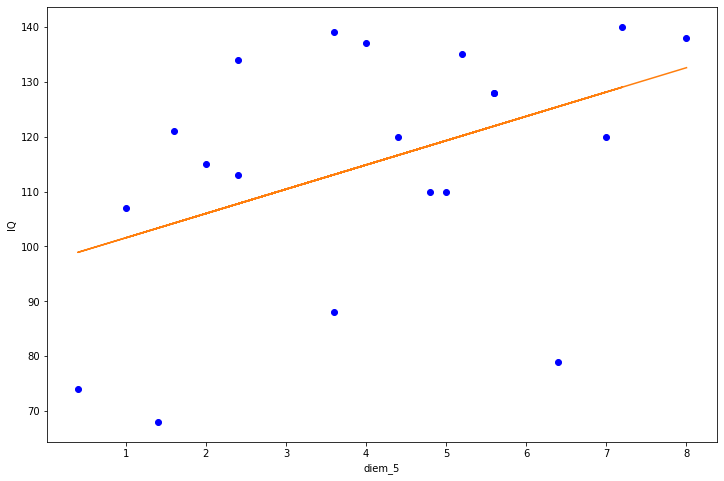

Dự đoán học sinh có điểm 0.5 có IQ: 99.36
Dự đoán học sinh có điểm 1.0 có IQ: 101.57
Dự đoán học sinh có điểm 5.0 có IQ: 119.27
Dự đoán học sinh có điểm 10 có IQ: 121.48

---- Cách 2: Giải bằng công thức dựa trên ma trận giả nghịch đảo ----
Ma trận diem (20,) :
 stt
1    1.4
2    4.0
3    5.2
Name: diem_5, dtype: float64

Ma trận x (20, 1) :
 [[1.4]
 [4. ]
 [5.2]]

Ma trận IQ (20,) :
 stt
1     68
2    137
3    135
Name: IQ, dtype: int64

Vectơ   y (20, 1) :
 [[ 68.]
 [137.]
 [135.]]

Ma trận xBar (20, 2) :
 [[1.  1.4]
 [1.  4. ]
 [1.  5.2]]

Ma trận A (2, 2) :
 [[ 20.    81.6 ]
 [ 81.6  426.08]]

Ma trận b (2, 1) :
 [[2304. ]
 [9812.6]]

Vector chứa các tham số w (2, 1) :
 [[97.14239093]
 [ 4.42588458]]

    y = m.x + B --> y =  [4.42588458] .x + ( [97.14239093] )



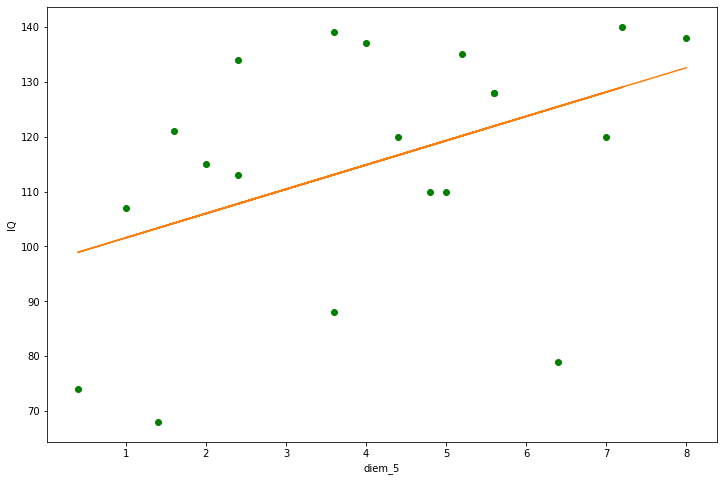

Dự đoán học sinh có điểm 0.5 có IQ: 99.36
Dự đoán học sinh có điểm 1.0 có IQ: 101.57
Dự đoán học sinh có điểm 5.0 có IQ: 119.27
Dự đoán học sinh có điểm 10 có IQ: 141.40


In [10]:
#3.4
print('\n-------------- Cách 1: Giải bằng hàm tính Gradient descent ------------')
##------------------------------------------------------------------------------

M     = df['diem_5'].size
xBar1 = np.c_[np.ones(M), df['diem_5']]
y     = df['IQ']
alpha = 0.01
theta = lib.gradient_descent_2(alpha, xBar1, y, 10000)

print('Ma trận x', xBar1.shape)
print('Ma trận y', y.shape)

slope1 = theta[1]
bias1  = theta[0]


for i in range(xBar1.shape[1]):
    IQ_predict = (slope1 * xBar1) + bias1

print('\n y = m.x + B --> y = ', slope1, '.x + (', bias1, ')\n')
plt.figure(figsize = (12, 8))
plt.scatter(xBar1[:, 1], df['IQ'], color = "blue")
plt.plot(xBar1, IQ_predict)
plt.xlabel("diem_5")
plt.ylabel("IQ")
plt.show()

diem_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])
IQ_new = (slope1 * diem_new) + bias1
print(u'Dự đoán học sinh có điểm 0.5 có IQ: %.2f' %IQ_new[0])
print(u'Dự đoán học sinh có điểm 1.0 có IQ: %.2f' %IQ_new[1])
print(u'Dự đoán học sinh có điểm 5.0 có IQ: %.2f' %IQ_new[9])
print(u'Dự đoán học sinh có điểm 10 có IQ: %.2f' %IQ_new[10])

print('\n---- Cách 2: Giải bằng công thức dựa trên ma trận giả nghịch đảo ----')

print('Ma trận diem', df['diem_5'].shape, ':\n', df.loc[0:3,'diem_5'])
x = np.zeros((df['diem_5'].size, 1))
x[:, 0] = df['diem_5']
print('\nMa trận x', x.shape, ':\n', x[0:3])

print('\nMa trận IQ', df['IQ'].shape, ':\n', df.loc[0:3,'IQ'])
y = np.zeros((df['IQ'].size, 1))
y[:, 0] = df['IQ']
print('\nVectơ   y', y.shape, ':\n', y[0:3])

one   = np.ones((x.shape[0], 1))
xBar2 = np.concatenate((one, x), axis = 1)
print('\nMa trận xBar', xBar2.shape, ':\n', xBar2[0:3])

A = np.dot(xBar2.T, xBar2)
print('\nMa trận A', A.shape, ':\n', A)

b = np.dot(xBar2.T, y)
print('\nMa trận b', b.shape, ':\n', b)

w = np.dot(np.linalg.pinv(A), b)
print('\nVector chứa các tham số w', w.shape, ':\n', w)

slope2 = w[1] 
bias2  = w[0]   

print('\n    y = m.x + B --> y = ', slope2, '.x + (', bias2, ')\n')
for i in range(xBar2.shape[1]):
    y_predict = (slope2 * xBar2) + bias2

plt.figure(figsize = (12, 8))
plt.scatter(xBar2[:, 1], df['IQ'], color = "green")
plt.plot(xBar2, y_predict)
plt.xlabel("diem_5")
plt.ylabel("IQ")
plt.show()

diem_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])
IQ_new = (slope2 * diem_new) + bias2
print(u'Dự đoán học sinh có điểm 0.5 có IQ: %.2f' %IQ_new[0])
print(u'Dự đoán học sinh có điểm 1.0 có IQ: %.2f' %IQ_new[1])
print(u'Dự đoán học sinh có điểm 5.0 có IQ: %.2f' %IQ_new[9])
print(u'Dự đoán học sinh có điểm 10 có IQ: %.2f' %IQ_new[19])
